In [ ]:
# Obtener lista de archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

In [ ]:
# Importar módulos necesarios
from google.colab import drive
import os
import pandas as pd

# Montar Google Drive (si es necesario)
# Este paso podría estar hecho en ejecuciones previas
drive.mount('/content/drive')

# Definir ruta a la carpeta que contiene los archivos
ruta_carpeta = '/content/drive/MyDrive/Proyecto 1/T28052_CNANCUAN_2017-2023'

# Obtener lista de archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Procesar cada archivo
for archivo in archivos:
    # Obtener ruta completa del archivo
    ruta_archivo = os.path.join(ruta_carpeta, archivo)

    # Leer datos de un archivo CSV en Google Drive
    df = pd.read_csv(ruta_archivo)

    # Divide los datos en columnas
    df = df.iloc[:, 0].str.split(',', expand=True)

    # Guarda los datos en un nuevo archivo CSV
    nombre_archivo_procesado = f"procesado_{archivo}"
    ruta_archivo_procesado = os.path.join(ruta_carpeta, nombre_archivo_procesado)
    df.to_csv(ruta_archivo_procesado, index=False, header=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

# Ruta del archivo CSV a limpiar
ruta_archivo = '/content/drive/MyDrive/Proyecto 1/T28052_CNANCUAN_2017-2023_procesados/archivo_combinado.csv'

# Crear la carpeta "archivo_limpio" si no existe dentro de "Proyecto 1"
carpeta_proyecto = '/content/drive/MyDrive/Proyecto 1/'
carpeta_salida = os.path.join(carpeta_proyecto, 'archivo_limpio')
if not os.path.exists(carpeta_salida):
    os.makedirs(carpeta_salida)

# Paso 1: Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Paso 2: Identificar y manejar valores nulos
# Verificar si hay valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df = df.dropna()

# Paso 3: Detectar y tratar valores atípicos
# Calcular estadísticas descriptivas
print(df.describe())

# Tratar valores atípicos (por ejemplo, eliminándolos)
# suponiendo que 'columna' es la columna que contiene los valores atípicos
# df = df[(df['columna'] > limite_inferior) & (df['columna'] < limite_superior)]

# Guardar el DataFrame limpio en un nuevo archivo CSV dentro de la carpeta "archivo limpio"
archivo_salida = os.path.join(carpeta_salida, 'archivo_limpiado.csv')
df.to_csv(archivo_salida, index=False)

print(f"El archivo limpio se ha guardado en la carpeta '{carpeta_salida}'.")


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64
                  0             2             3             4
count  2.242888e+06  2.242888e+06  2.242888e+06  2.242888e+06
mean   3.618062e+08  3.233719e+01  9.889183e-01  3.940356e+00
std    1.257505e+08  7.411182e+01  5.567142e-01  4.551781e-01
min    1.777602e+08 -5.970000e+02  0.000000e+00  0.000000e+00
25%    2.255402e+08 -3.060203e+00  1.000000e+00  4.000000e+00
50%    3.925612e+08  4.379995e+01  1.000000e+00  4.000000e+00
75%    4.333882e+08  8.145735e+01  1.000000e+00  4.000000e+00
max    8.546412e+08  3.199903e+02  3.300000e+01  4.000000e+00
El archivo limpio se ha guardado en la carpeta '/content/drive/MyDrive/Proyecto 1/archivo_limpio'.


In [ ]:
df.head()

,0,1,2,3,4,5
0,395102211,2020-08-01 00:00:00-0400,-226.033845,1,4,BUIN 110 HT1 MTP
1,395684211,2020-08-01 00:00:00-0400,66.060887,1,4,BUIN 110 H2 P
2,397670211,2020-08-01 00:00:00-0400,27.004823,1,4,LOSALME 110 H1 P
3,397693211,2020-08-01 00:00:00-0400,75.670832,1,4,LOSALME 110 H3 P
4,397712211,2020-08-01 00:00:00-0400,94.000213,1,4,LOSALME 110 H4 P


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Monta Google Drive si aún no lo has hecho
from google.colab import drive
drive.mount('/content/drive')

# Define la ruta de la carpeta que contiene los archivos CSV
carpeta_en_drive = '/content/drive/MyDrive/Proyecto 1/archivo_limpio'

# Obtén la lista de archivos CSV en la carpeta seleccionada
archivos_csv = [archivo for archivo in os.listdir(carpeta_en_drive) if archivo.endswith('.csv')]

# Concatena los datos de todos los archivos CSV en uno solo
datos_combinados = pd.concat([pd.read_csv(os.path.join(carpeta_en_drive, archivo)) for archivo in archivos_csv])

datos_combinados['1'] = datos_combinados['1'].str.split('-').str[0]  # Elimina la zona horaria
datos_combinados['1'] = pd.to_datetime(datos_combinados['1'])  # Convierte a formato de fecha y hora de Python
datos_combinados['dia'] = datos_combinados['1'].dt.day
datos_combinados['hora'] = datos_combinados['1'].dt.hour

le = LabelEncoder()
datos_combinados['5'] = le.fit_transform(datos_combinados['5'])






# Elimina la columna de fecha y hora original si no es necesaria para el modelo
datos_combinados = datos_combinados.drop(columns=['1'])


# Divide los datos en características (X) y etiquetas (y)
X = datos_combinados.drop(columns=["2"])
y = datos_combinados["2"]

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Diseño del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
89716/89716 [==============================] - 223s 2ms/step - loss: 1617.6742 - mae: 29.8889 - val_loss: 1275.6304 - val_mae: 27.0191
Epoch 2/10
89716/89716 [==============================] - 229s 3ms/step - loss: 1241.7255 - mae: 26.3297 - val_loss: 1228.9059 - val_mae: 25.8989
Epoch 3/10
89716/89716 [==============================] - 222s 2ms/step - loss: 1198.2134 - mae: 25.5293 - val_loss: 1221.3802 - val_mae: 25.8412
Epoch 4/10
89716/89716 [==============================] - 207s 2ms/step - loss: 1164.0249 - mae: 24.8953 - val_loss: 1143.6003 - val_mae: 24.4352
Epoch 5/10
89716/89716 [==============================] - 223s 2ms/step - loss: 1134.7000 - mae: 24.3758 - val_loss: 1125.2439 - val_mae: 24.2447
Epoch 6/10
89716/89716 [==============================] - 226s 3ms/step - loss: 1113.0088 - mae: 24.0442 - val_loss: 1096.3633 - val_mae: 23.

In [ ]:
# Hacer predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

# Imprimir las primeras 10 predicciones
print("Predicciones:", predicciones[:10])

# Comparar las predicciones con los valores reales
for i in range(10):
    print("Predicción:", predicciones[i])
    print("Valor real:", y_test.iloc[i])  # Suponiendo que 'y_test' es una Serie de pandas
    print()  # Salto de línea para separar las predicciones

28037/28037 [==============================] - 43s 2ms/step
Predicciones: [[  82.92964   ]
 [   0.67274594]
 [  44.756596  ]
 [ 119.61867   ]
 [  44.756596  ]
 [  98.76884   ]
 [-191.3108    ]
 [  78.32489   ]
 [  43.89963   ]
 [ -24.124239  ]]
Predicción: [82.92964]
Valor real: 126.277732

Predicción: [0.67274594]
Valor real: -0.230716

Predicción: [44.756596]
Valor real: 24.003703

Predicción: [119.61867]
Valor real: 112.077396

Predicción: [44.756596]
Valor real: 25.021231

Predicción: [98.76884]
Valor real: 114.350562

Predicción: [-191.3108]
Valor real: -194.155715

Predicción: [78.32489]
Valor real: 103.925923

Predicción: [43.89963]
Valor real: 34.691838

Predicción: [-24.124239]
Valor real: -19.873708



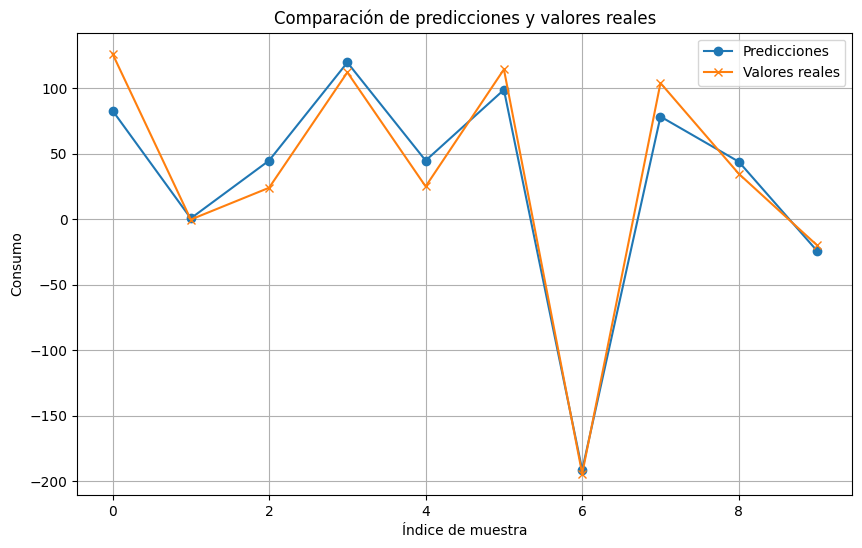

In [ ]:
# Graficar las primeras 10 predicciones junto con los valores reales
plt.figure(figsize=(10, 6))
plt.plot(predicciones[:10], label='Predicciones', marker='o')
plt.plot(y_test[:10].values, label='Valores reales', marker='x')
plt.xlabel('Índice de muestra')
plt.ylabel('Consumo')
plt.title('Comparación de predicciones y valores reales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculo del MAE entre las predicciones y los valores reales
mae = mean_absolute_error(y_test, predicciones)

print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 23.734829866865258
